<a href="https://colab.research.google.com/github/arewadataScience/ArewaDS-Deep-Learning/blob/main/Part_1_Deep_Learning_with_Pytorch/week2/week_2_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Arewa DataScience Academy
### Deep Learning Cohort 1.0

### WEEK 2 Exercises

### Exercises:
Please, see week 2 exercises from [**Learn PyTorch for Deep Learning**: 01. Pytorch Workflows](https://www.learnpytorch.io/01_pytorch_workflow/#exercises)

### Additional Exercise
[Click to view PDF 📄](ArewaDS_Deep_Learning_Advanced_Assignment_Week2.pdf)

In [2]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

In [3]:
# Create *known* parameters
weight = 0.9
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3180],
         [0.3360],
         [0.3540],
         [0.3720],
         [0.3900],
         [0.4080],
         [0.4260],
         [0.4440],
         [0.4620]]))

In [4]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

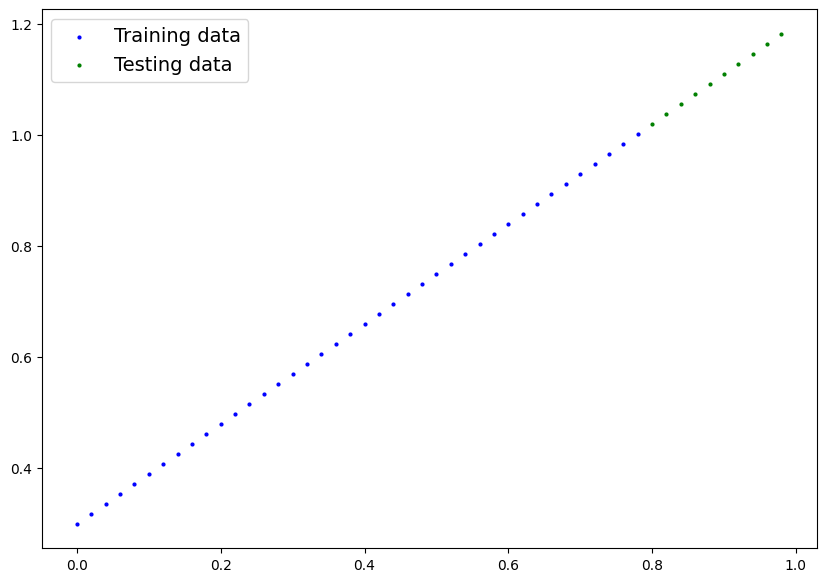

In [6]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14})

plot_predictions()

In [7]:
# Define a custom Linear Regression model using nn.Parameter
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        # Random initialization of weights and bias
        self.weights = nn.Parameter(torch.randn(input_dim, output_dim, requires_grad=True))
        self.bias = nn.Parameter(torch.randn(output_dim, requires_grad=True))

    def forward(self, x):
        # Linear function: y = xW + b
        return x @ self.weights + self.bias

# Instantiate the model
model =LinearRegressionModel(input_dim=1, output_dim=1)

# Check model parameters (state_dict)
print("Model state_dict:")
for param_name, param_value in model.state_dict().items():
    print(f"{param_name}: {param_value}")

Model state_dict:
weights: tensor([[1.5696]])
bias: tensor([-0.3505])


In [ ]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)

In [8]:
# Assuming we're doing univariate regression (input_dim=1)
X_train = torch.randn(100, 1)
y_train = 3 * X_train + 2 + torch.randn(100, 1) * 0.1  # y = 3x + 2 + noise

X_test = torch.randn(20, 1)
y_test = 3 * X_test + 2 + torch.randn(20, 1) * 0.1

# Initialize model
model = LinearRegressionModel(input_dim=1, output_dim=1)

# Define L1 loss (Mean Absolute Error)
loss_fn = nn.L1Loss()

# Optimizer: Stochastic Gradient Descent
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

# Training Loop
epochs = 300

for epoch in range(1, epochs + 1):
    model.train()

    # Forward pass
    y_pred = model(X_train)

    # Compute loss
    loss = loss_fn(y_pred, y_train)

    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Test every 20 epochs
    if epoch % 20 == 0:
        model.eval()
        with torch.no_grad():
            test_preds = model(X_test)
            test_loss = loss_fn(test_preds, y_test)
        print(f"Epoch {epoch:3d} | Train Loss: {loss.item():.4f} | Test Loss: {test_loss.item():.4f}")

Epoch  20 | Train Loss: 2.6385 | Test Loss: 2.6139
Epoch  40 | Train Loss: 2.5030 | Test Loss: 2.4764
Epoch  60 | Train Loss: 2.3676 | Test Loss: 2.3389
Epoch  80 | Train Loss: 2.2326 | Test Loss: 2.2023
Epoch 100 | Train Loss: 2.0977 | Test Loss: 2.0660
Epoch 120 | Train Loss: 1.9629 | Test Loss: 1.9296
Epoch 140 | Train Loss: 1.8280 | Test Loss: 1.7933
Epoch 160 | Train Loss: 1.6932 | Test Loss: 1.6571
Epoch 180 | Train Loss: 1.5589 | Test Loss: 1.5220
Epoch 200 | Train Loss: 1.4246 | Test Loss: 1.3870
Epoch 220 | Train Loss: 1.2903 | Test Loss: 1.2519
Epoch 240 | Train Loss: 1.1560 | Test Loss: 1.1169
Epoch 260 | Train Loss: 1.0221 | Test Loss: 0.9828
Epoch 280 | Train Loss: 0.8883 | Test Loss: 0.8491
Epoch 300 | Train Loss: 0.7555 | Test Loss: 0.7171


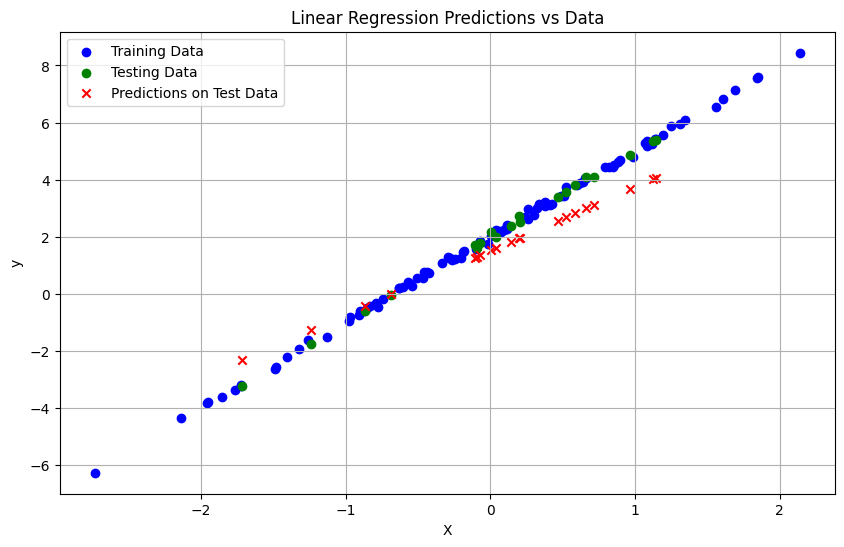

In [9]:
# Ensure model is in eval mode
model.eval()

# Move data and predictions to CPU for plotting
with torch.no_grad():
    X_train_cpu = X_train.cpu()
    y_train_cpu = y_train.cpu()
    X_test_cpu = X_test.cpu()
    y_test_cpu = y_test.cpu()

    predictions = model(X_test_cpu)

# Plotting
plt.figure(figsize=(10, 6))

# Plot training data
plt.scatter(X_train_cpu.numpy(), y_train_cpu.numpy(), color='blue', label='Training Data')

# Plot test data
plt.scatter(X_test_cpu.numpy(), y_test_cpu.numpy(), color='green', label='Testing Data')

# Plot predictions
plt.scatter(X_test_cpu.numpy(), predictions.cpu().numpy(), color='red', label='Predictions on Test Data', marker='x')

plt.title("Linear Regression Predictions vs Data")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Ensure model is in eval mode
model.eval()

with torch.no_grad():
    y_pred_test = model(X_test).cpu().numpy()
    y_true_test = y_test.cpu().numpy()

# Compute regression metrics
mae = mean_absolute_error(y_true_test, y_pred_test)
mse = mean_squared_error(y_true_test, y_pred_test)
r2 = r2_score(y_true_test, y_pred_test)

print(f"📊 Model Evaluation on Test Data:")
print(f"🔹 MAE (Mean Absolute Error): {mae:.4f}")
print(f"🔹 MSE (Mean Squared Error): {mse:.4f}")
print(f"🔹 R² Score: {r2:.4f}")

📊 Model Evaluation on Test Data:
🔹 MAE (Mean Absolute Error): 0.7171
🔹 MSE (Mean Squared Error): 0.6489
🔹 R² Score: 0.8694


In [12]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_1.pth


In [16]:
# Instantiate a fresh instance of LinearRegressionModelV2
loaded_model_1 = LinearRegressionModel(input_dim=1, output_dim=1) # Provide input_dim and output_dim

# Load model state dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Define the device
# If you have a GPU available and CUDA installed, you can use:
# device = torch.device("cuda")
# Otherwise, use CPU:
device = torch.device("cpu")

# Put model to target device (if your data is on GPU, model will have to be on GPU to make predictions)
loaded_model_1.to(device)

print(f"Loaded model:\n{loaded_model_1}")
print(f"Model on device:\n{next(loaded_model_1.parameters()).device}")

Loaded model:
LinearRegressionModel()
Model on device:
cpu


In [18]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)

# Get predictions from original model
with torch.inference_mode():
    y_preds = model(X_test) # Assuming 'model' is the original model

#Compare predictions
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])